In [1]:
import pandas as pd
file_path = r"C:\Users\supri\Downloads\preprocedata.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   bmi                  100000 non-null  float64
 2   HbA1c_level          100000 non-null  float64
 3   blood_glucose_level  100000 non-null  float64
 4   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.8 MB


,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.713683,0.177171,0.941427,0.820981,0
1,1.480391,0.202031,0.941427,0.693147,0
2,1.175563,0.202031,0.875469,0.856348,0
3,1.279616,0.156863,0.820981,0.850539,0
4,1.681147,0.118231,0.804851,0.850539,0


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
X = df.drop(columns=['diabetes']) 
y = df['diabetes'] 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (80000, 4) (80000,)
Testing data shape: (20000, 4) (20000,)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test_scaled)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.96
Confusion Matrix:
 [[18130   170]
 [  646  1054]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.62      0.72      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [9]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

               Feature  Coefficient
2          HbA1c_level     2.673559
3  blood_glucose_level     1.408056
0                  age     1.327057
1                  bmi     0.686793


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

Best Hyperparameters: {'C': 1}


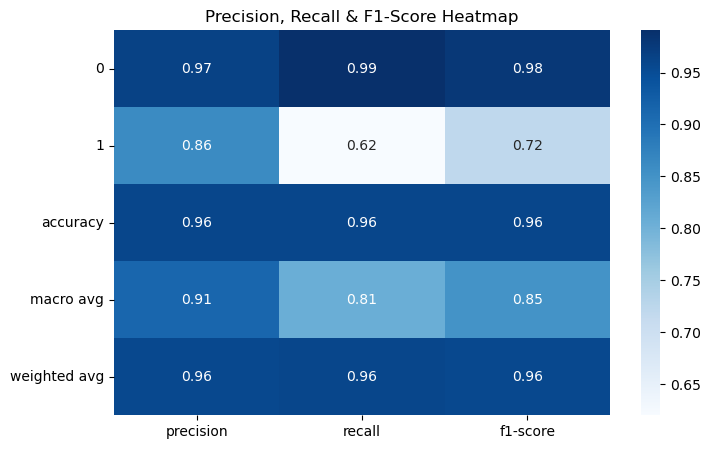

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T
report_df = report_df.drop(columns=['support'])
plt.figure(figsize=(8, 5))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Precision, Recall & F1-Score Heatmap")
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear']  
}
param_labels = {
    'C': "Inverse of regularization strength (higher = less regularization)",
    'penalty': "Type of Regularization (L1 = Lasso, L2 = Ridge)",
    'solver': "Solver used for optimization"
}
for param, description in param_labels.items():
    print(f"{param}: {description}")
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

C: Inverse of regularization strength (higher = less regularization)
penalty: Type of Regularization (L1 = Lasso, L2 = Ridge)
solver: Solver used for optimization
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}



Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.62      0.72      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



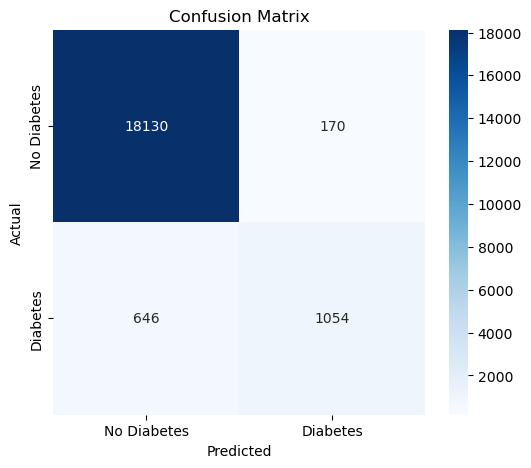

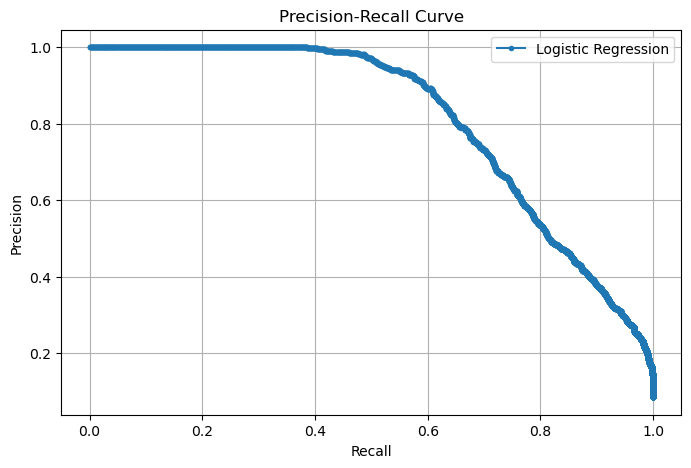

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
precision, recall, _ = precision_recall_curve(y_test, best_model.decision_function(X_test_scaled))
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [15]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.62      0.72      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



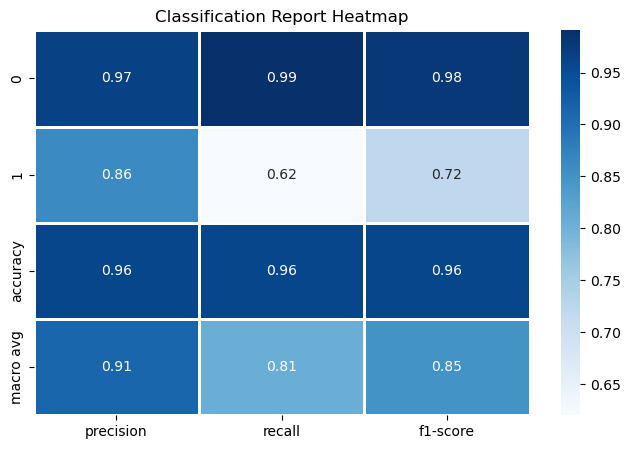

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=1)
plt.title("Classification Report Heatmap")
plt.show()

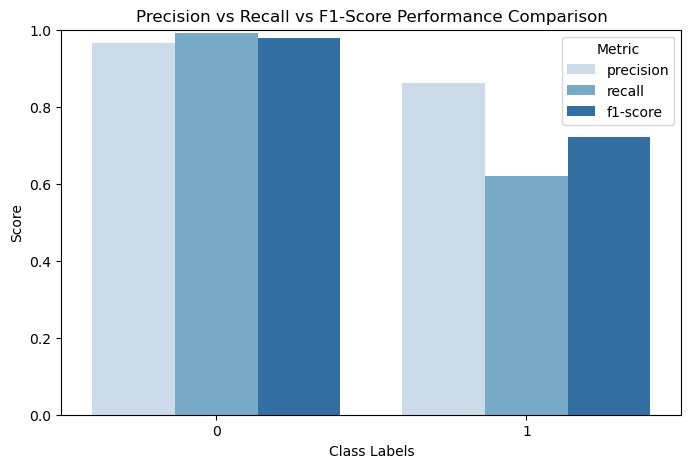

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).T
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])

report_melted = report_df[['precision', 'recall', 'f1-score']].reset_index().melt(id_vars='index')

plt.figure(figsize=(8, 5))
sns.barplot(x='index', y='value', hue='variable', data=report_melted, palette="Blues")

plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.ylim(0, 1)  
plt.title("Precision vs Recall vs F1-Score Performance Comparison")
plt.legend(title="Metric")
plt.show()

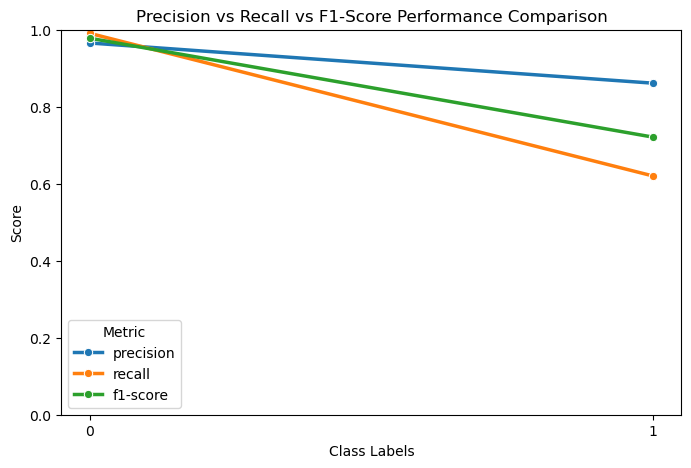

In [20]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='index', y='value', hue='variable', data=report_melted, marker='o', linewidth=2.5)
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Precision vs Recall vs F1-Score Performance Comparison")
plt.legend(title="Metric")
plt.show()